# Single Family Collection

In [3]:
# Import libraries
from swolfpy_processmodels import SF_Col
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set font for plots
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "14"

# Set specs for pandas
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 500)

## Collection Schemes

* **Residual waste collection**
    * Midex Resiudal Waste Collection (RWC)
    * Source Separated Organics (SSO) + Dry Residuals
    * Recycalbles (REC) + Wet Residuals
    * Mixed Residual Waste Dropoff (MRDO)
* **Source separated services for recyclables**
    * Single Stream Recyclables (SSR)
    * Dual Stream Recyclables (DSR) 
    * Multi Stream Recyclables (MSR)
    * Multi Stream Recyclables Dropoff (MSRDO)
* **Source separated services for yard waste**
    * Source separated Yard Waste (SSYW)
    * Source separated Yard Waste Dropoff (SSYWDO)

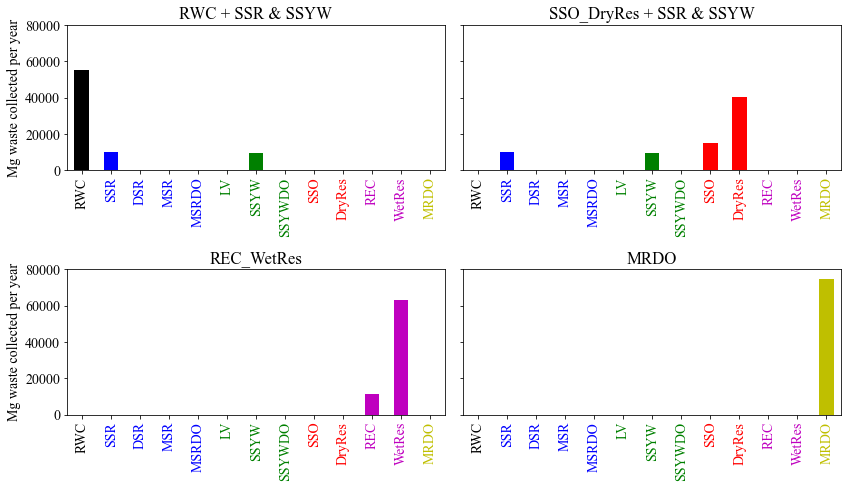

In [86]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 7), sharey=True)

colors = ['k', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'r', 'r', 'm', 'm', 'y']

# Ax1: RWC
scheme=SF_Col.scheme()
scheme['RWC']['Contribution'] = 1
scheme['RWC']['separate_col']['SSR'] = 1
scheme['RWC']['separate_col']['SSYW'] = 1
model = SF_Col('Sector1', scheme)
model.calc()
model.col_massflow.sum().plot(kind='bar', ax=ax1, color=colors)
ax1.set_ylabel('Mg waste collected per year')
ax1.set_title('RWC + SSR & SSYW')

# Ax2: SSO_DryRes
scheme=SF_Col.scheme()
scheme['SSO_DryRes']['Contribution'] = 1
scheme['SSO_DryRes']['separate_col']['SSR'] = 1
scheme['SSO_DryRes']['separate_col']['SSYW'] = 1
model = SF_Col('Sector1', scheme)
model.calc()
model.col_massflow.sum().plot(kind='bar', ax=ax2, color=colors)
ax2.set_ylabel('Mg waste collected per year')
ax2.set_title('SSO_DryRes + SSR & SSYW')

# Ax3: REC_WetRes
scheme=SF_Col.scheme()
scheme['REC_WetRes']['Contribution'] = 1
model = SF_Col('Sector1', scheme)
model.calc()
model.col_massflow.sum().plot(kind='bar', ax=ax3, color=colors)
ax3.set_ylabel('Mg waste collected per year')
ax3.set_title('REC_WetRes')

# Ax4: MRDO
scheme=SF_Col.scheme()
scheme['MRDO']['Contribution'] = 1
model = SF_Col('Sector1', scheme)
model.calc()
model.col_massflow.sum().plot(kind='bar', ax=ax4, color=colors)
ax4.set_ylabel('Mg waste collected per year')
ax4.set_title('MRDO')

for ax in [ax1, ax2, ax3, ax4]:
    for i,j in enumerate(ax.get_xticklabels()):
        j.set_color(colors[i])
        ax.set_ylim((0,80000))
    
fig.tight_layout()